# Multiple Linear Regression

Multiple Linear Regression uses two or more independent variables to predict the values of the dependent variable. It is based on the following equation that we’ll explore later on:

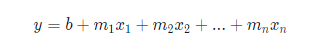

# Multiple Linear Regression Equation

Now that we have implemented Multiple Linear Regression, we will learn how to tune and evaluate the model. Before we do that, however, it’s essential to learn the equation behind it.

Equation 6.1 The equation for multiple linear regression that uses two independent variables is this:


 
Equation 6.2 The equation for multiple linear regression that uses three independent variables is this:

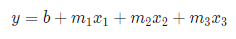
 
Equation 6.3 As a result, since multiple linear regression can use any number of independent variables, its general equation becomes:

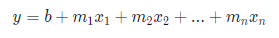
 
Here, m1, m2, m3, … mn refer to the coefficients, and b refers to the intercept that you want to find. You can plug these values back into the equation to compute the predicted y values.

Remember, with sklearn‘s LinearRegression() method, we can get these values with ease.

The .fit() method gives the model two variables that are useful to us:

* .coef_, which contains the coefficients
* .intercept_, which contains the intercept

After performing multiple linear regression, you can print the coefficients using .coef_.

Coefficients are most helpful in determining which independent variable carries more weight. For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, with the former impacting prices negatively and latter positively.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
#import dataframe
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")
df = pd.DataFrame(streeteasy)
print(df.head())

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [15]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 
        'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 
        'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]
print(x.head())
print(y.head())

   bedrooms  bathrooms  size_sqft  min_to_subway  floor  building_age_yrs  \
0       0.0          1        480              9    2.0                17   
1       2.0          2       2000              4    1.0                96   
2       1.0          1        916              2   51.0                29   
3       1.0          1        975              3    8.0                31   
4       2.0          2       4800              3    4.0               136   

   no_fee  has_roofdeck  has_washer_dryer  has_doorman  has_elevator  \
0       1             1                 0            0             1   
1       0             0                 0            0             0   
2       0             1                 0            1             1   
3       0             0                 0            1             1   
4       0             0                 0            1             1   

   has_dishwasher  has_patio  has_gym  
0               1          0        1  
1               0       

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


In [24]:
# predict rent for Sonny's Apartment

sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
predict_sonny = model.predict(sonny_apartment)
print("Predicted rent: $%.2f" % predict_sonny)


Predicted rent: $2393.58


## Visualizing Results with Matplotlib

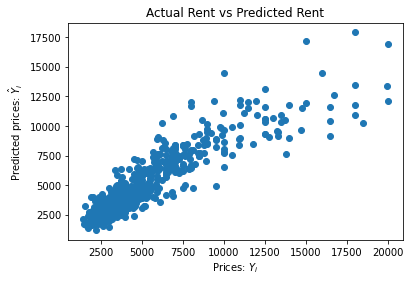

In [25]:
plt.scatter(y_test, y_predict)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")
plt.show()

In [26]:
#Print out the coefficients
print(model.coef_)

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


## Correlations

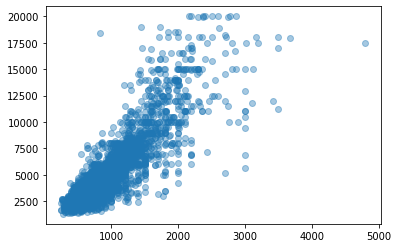

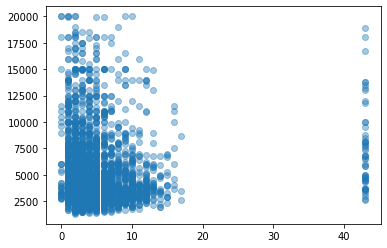

In [30]:
#catterplot of size_sqft and rent
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.show()
#scatterplot of min_to_subway and rent
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)
plt.show()